Importation of the 'pandas' module to manipulate the data.

In [1]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Preprocessing


First, let's drop from the table the 'Unnamed:0' and 'flight' columns as they represent the row number and the flight number respectively, information that is irrelevant to the study of the data.

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

Now, the 'stops' and 'class' columns will be manipulated. The 'stops' column will be factorized (changing the number from a word to the actual number) and the 'class' column content will be changed to number. All of this will help the model analyse the data in these columns.

In [4]:
df.stops = pd.factorize(df.stops)[0]
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

For the rest of the dataset, we will have to check how many unique values each feature has, allowing for a deeper perspective of how the data can be manipulated.

In [5]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [6]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [7]:
df.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [8]:
df.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [9]:
df.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

Since all the features posess six unique values each, the 'get_dummies' method can be applied to our dataset. This method will 'expand' the features of our dataset because each unique value of the above features will now have their own column in the dataset with two possible values - one and zero.

In [10]:
df = df.join(pd.get_dummies(df.airline, dtype=int, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, dtype=int, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, dtype=int, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, dtype=int, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, dtype=int, prefix='departure')).drop('departure_time', axis=1)

In [11]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Once the dataset is clean and ready, our study of the data will focus on creating a model to predict flight ticket prices. Two methods will be used - the first one will be a simple random forest regression where splitting the data is the only necessary step in order to apply this model. The second one will require defining some extra features using hyperparameter tunning.

## First Regression Model



Importation of the modules and definition of our data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

Splitting of the data between training and testing data. In this case, 80% of the original data will be used for training and the 20% left will be used for testing the perfomance of the model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [15]:
reg.score(X_test, y_test)

0.9853169958125377

In [16]:
import math
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2: 0.9853169958125377
Mean absolute error: 1074.2460417145585


Text(0.5, 1.0, 'Prediction Vs actual price')

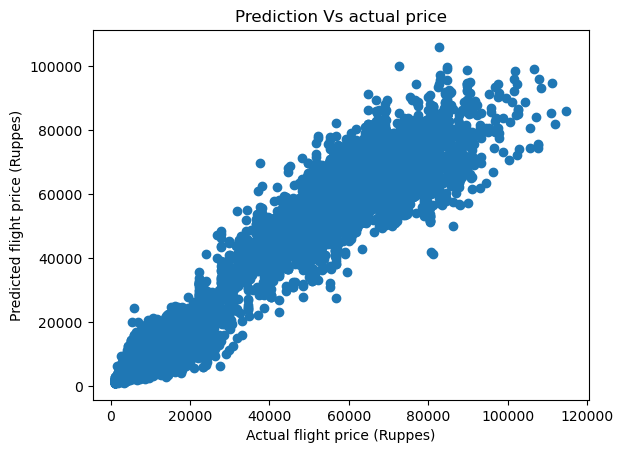

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price (Ruppes)')
plt.ylabel('Predicted flight price (Ruppes)')
plt.title('Prediction Vs actual price')

Thanks to the model metrics, it is clear that there is a correlation between the variables, and that the model predictions are separated from the actual values by an average of 1074 rupees (approximately 9 sterling pounds). In general, our model performs well as seen in the graph above, where the predicted and actual values are really close together.

## Second Regression Model

For this second model, some extra parameters will be defined with a set of values each. Next, this model will find the best values for each parameter defined previously, which in addition to the chosen estimator will analyse our training data and predict our test data. This second model will not be run because of the time it takes to train the model.

In [18]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1.0, 'sqrt']
}

grid_search= GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = grid_search.best_estimator_.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price (Ruppes)')
plt.ylabel('Predicted flight price (Ruppes)')
plt.title('Prediction Vs actual price')